## Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Importation des datasets

df1 est le premier dataset sur les retards (grandes lignes) df2 est le second dataset traitant des données en ile de france

In [2]:
df1=pd.read_csv('Regularities_by_liaisons_Trains_France.csv')

In [3]:
df1.head(10)

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),...,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
0,2019,7.0,ANGOULEME,PARIS MONTPARNASSE,131.914980,247.0,0.0,191.0,3.576353,2.678273,...,32.965873,7.0,2.0,2019-07,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000
1,2019,7.0,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242.0,0.0,178.0,9.780805,7.033609,...,32.057143,14.0,2.0,2019-07,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
2,2019,7.0,LE MANS,PARIS MONTPARNASSE,62.395349,435.0,5.0,391.0,3.896974,3.529341,...,42.367241,13.0,4.0,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941
3,2019,7.0,ST MALO,PARIS MONTPARNASSE,172.421053,114.0,0.0,101.0,1.950990,1.685673,...,27.620833,2.0,0.0,2019-07,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308
4,2019,7.0,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404.0,4.0,284.0,8.379108,5.803125,...,37.658333,12.0,3.0,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385
5,2019,7.0,PARIS MONTPARNASSE,TOULOUSE MATABIAU,266.594737,190.0,0.0,123.0,4.765989,2.887719,...,47.343452,13.0,4.0,2019-07,25.925926,33.333333,22.222222,18.518519,0.000000,0.000000
6,2019,7.0,TOULOUSE MATABIAU,PARIS MONTPARNASSE,265.262887,194.0,0.0,86.0,5.124225,1.714691,...,45.610920,13.0,4.0,2019-07,37.931034,27.586207,6.896552,20.689655,3.448276,3.448276
7,2019,7.0,PARIS EST,METZ,85.399381,323.0,0.0,239.0,10.278452,7.552477,...,60.874405,16.0,11.0,2019-07,24.000000,18.000000,16.000000,26.000000,16.000000,0.000000
8,2019,7.0,PARIS EST,REIMS,46.305556,222.0,6.0,190.0,4.985263,4.361883,...,47.841667,11.0,5.0,2019-07,32.352941,14.705882,17.647059,23.529412,11.764706,0.000000
9,2019,7.0,PARIS NORD,DOUAI,67.000000,180.0,3.0,63.0,13.862169,4.626083,...,35.613889,10.0,3.0,2019-07,6.666667,26.666667,20.000000,20.000000,26.666667,0.000000


In [4]:
df2=pd.read_csv('Travel_titles_validations_in_Paris_and_suburbs.csv')

In [5]:
df2.head(10)

,DATE,STATION_NAME,ID_REFA_LDA,TITLE_CATEGORY,NB_VALID
0,21/07/2019,LA TOUR MAUBOURG,71242.0,NAVIGO,1141
1,21/07/2019,PARMENTIER,71801.0,NOT DEFINED,Less than 5
2,21/07/2019,PARMENTIER,71801.0,TST,97
3,21/07/2019,PEREIRE-LEVALLOIS,71453.0,FGT,53
4,21/07/2019,PERNETY,412687.0,OTHER,36
5,21/07/2019,PICPUS,71639.0,FGT,25
6,21/07/2019,PIERRE CURIE,70537.0,IMAGINE R,264
7,21/07/2019,PIGALLE,71409.0,DAILY NAVIGO,7
8,21/07/2019,PLACE DES FETES,71885.0,?,20
9,21/07/2019,PLACE DES FETES,71885.0,AMETHYSTE,297


In [6]:
df2[df2['STATION_NAME']=='LA TOUR MAUBOURG']

,DATE,STATION_NAME,ID_REFA_LDA,TITLE_CATEGORY,NB_VALID
0,21/07/2019,LA TOUR MAUBOURG,71242.0,NAVIGO,1141
865,19/08/2019,LA TOUR MAUBOURG,71242.0,OTHER,27
866,19/08/2019,LA TOUR MAUBOURG,71242.0,FGT,68
867,19/08/2019,LA TOUR MAUBOURG,71242.0,TST,106
1097,22/07/2019,LA TOUR MAUBOURG,71242.0,NAVIGO,3213
...,...,...,...,...,...
880179,01/08/2019,LA TOUR MAUBOURG,71242.0,DAILY NAVIGO,10
882345,02/09/2019,LA TOUR MAUBOURG,71242.0,NAVIGO,3187
883002,28/08/2019,LA TOUR MAUBOURG,71242.0,AMETHYSTE,73
883003,28/08/2019,LA TOUR MAUBOURG,71242.0,FGT,75


# Exploration des datasets

La fonction info permet de voir l'ensemble des colonnes de nos jeux de données

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7806 entries, 0 to 7805
Data columns (total 32 columns):
 #   Column                                                                                                               Non-Null Count  Dtype  
---  ------                                                                                                               --------------  -----  
 0   Year                                                                                                                 7806 non-null   int64  
 1   Month                                                                                                                7806 non-null   float64
 2   Departure station                                                                                                    7806 non-null   object 
 3   Arrival station                                                                                                      7806 non-null   object 
 4   Average trav

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883958 entries, 0 to 883957
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            883958 non-null  object 
 1   STATION_NAME    883958 non-null  object 
 2   ID_REFA_LDA     882459 non-null  float64
 3   TITLE_CATEGORY  883958 non-null  object 
 4   NB_VALID        883958 non-null  object 
dtypes: float64(1), object(4)
memory usage: 33.7+ MB


La fonction describe permet d'obtenir des premieres statistiques sur nos données permettant de voir quelles variables peuvent nous intéresser

In [9]:
df1.describe()

,Year,Month,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Comment (optional) delays at departure,Number of trains late on arrival,...,Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
count,7806.000000,7806.000000,7743.000000,7743.000000,7806.000000,7806.000000,7806.000000,7743.000000,0.0,7706.000000,...,7738.000000,7699.000000,7738.000000,7738.000000,7535.000000,7535.000000,7535.000000,7535.000000,7535.000000,7535.000000
mean,2017.345119,6.216372,166.759261,266.510913,7.911478,63.519088,14.744145,2.956191,NaN,36.019595,...,24.545231,29.379555,11.055441,4.000129,26.708546,25.504166,19.195005,18.109877,6.768831,3.643517
std,1.596611,3.440601,80.737092,157.456548,20.997806,78.822324,13.373758,5.951154,NaN,29.210396,...,20.323532,18.929319,9.921009,4.459822,16.280439,16.010052,14.880847,13.282123,7.877975,5.782651
min,2015.000000,1.000000,35.888889,1.000000,0.000000,0.000000,0.000000,-229.269444,NaN,0.000000,...,0.000000,-118.022363,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,3.000000,100.643605,163.000000,0.000000,12.000000,7.559617,1.007765,NaN,16.000000,...,10.000000,9.177749,4.000000,1.000000,15.625000,15.000000,8.695652,9.259259,0.000000,0.000000
50%,2017.000000,6.000000,162.178808,227.000000,1.000000,33.000000,13.535727,2.014571,NaN,28.000000,...,19.000000,32.022500,8.000000,3.000000,25.000000,23.529412,17.142857,16.129032,5.000000,1.754386
75%,2019.000000,9.000000,207.885957,352.000000,6.000000,84.000000,18.713366,3.691398,NaN,48.000000,...,33.000000,41.313095,15.000000,6.000000,35.714286,33.333333,26.923077,25.000000,10.000000,5.555556
max,2020.000000,12.000000,786.500000,960.000000,279.000000,591.000000,316.188095,173.571429,NaN,235.000000,...,192.000000,258.000000,91.000000,37.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [10]:
df2.describe()

,ID_REFA_LDA
count,882459.000000
mean,69150.277691
std,27606.821859
min,-1.000000
25%,66338.000000
50%,71158.000000
75%,71756.000000
max,415852.000000


# Netoyage des datasets en fonctions du contenu de leurs colonnes

La colonne 'Comment' du premier dataset est nulle on peut la supprimer

In [11]:
df1.drop(columns=['Comment (optional) delays at departure'],inplace=True)

Remplacer les données abérantes (negative et nulle) par des NaN

In [12]:
for i in df1.index:
  for j in df1.columns :
    if df1[j].dtype=='int64' or df1[j].dtype=='float64' :
      if df1[j][i]<0:
        df1[j][i]=np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [13]:
df1.head(6)

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),...,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
0,2019,7.0,ANGOULEME,PARIS MONTPARNASSE,131.914980,247.0,0.0,191.0,3.576353,2.678273,...,32.965873,7.0,2.0,2019-07,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000
1,2019,7.0,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242.0,0.0,178.0,9.780805,7.033609,...,32.057143,14.0,2.0,2019-07,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
2,2019,7.0,LE MANS,PARIS MONTPARNASSE,62.395349,435.0,5.0,391.0,3.896974,3.529341,...,42.367241,13.0,4.0,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941
3,2019,7.0,ST MALO,PARIS MONTPARNASSE,172.421053,114.0,0.0,101.0,1.950990,1.685673,...,27.620833,2.0,0.0,2019-07,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308
4,2019,7.0,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404.0,4.0,284.0,8.379108,5.803125,...,37.658333,12.0,3.0,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385
5,2019,7.0,PARIS MONTPARNASSE,TOULOUSE MATABIAU,266.594737,190.0,0.0,123.0,4.765989,2.887719,...,47.343452,13.0,4.0,2019-07,25.925926,33.333333,22.222222,18.518519,0.000000,0.000000


Renomer la colonne ID_REFA_LDA  du deuxième dataset pour un nom plus parlant

In [14]:
df2.rename(columns={'ID_REFA_LDA':'ID_STATION'},inplace=True)

Porte Dauphine est la seule station avec un ID en Nan, changeons le 

In [15]:
df2[pd.isna(df2['ID_STATION'])]

,DATE,STATION_NAME,ID_STATION,TITLE_CATEGORY,NB_VALID
4188,02/08/2019,PORTE DAUPHINE,NaN,AMETHYSTE,132
4190,02/08/2019,PORTE DAUPHINE,NaN,OTHER,31
4192,02/08/2019,PORTE DAUPHINE,NaN,TST,298
5193,24/08/2019,PORTE DAUPHINE,NaN,?,34
6107,28/07/2019,PORTE DAUPHINE,NaN,?,27
...,...,...,...,...,...
882059,01/09/2019,PORTE DAUPHINE,NaN,AMETHYSTE,87
882060,01/09/2019,PORTE DAUPHINE,NaN,DAILY NAVIGO,Less than 5
882483,31/08/2019,PORTE DAUPHINE,NaN,DAILY NAVIGO,Less than 5
883177,28/08/2019,PORTE DAUPHINE,NaN,DAILY NAVIGO,6


In [16]:
max=df2['ID_STATION'].max()+1

In [17]:
df2['ID_STATION'].replace(np.nan, max,inplace=True)

Met l'index station sour le format string

In [18]:
df2['ID_STATION']=df2['ID_STATION'].astype(int).astype(str)

Transformer la colonne nb_valid du 2eme dataset en int

In [19]:
df2.replace('Less than 5',2,inplace=True) #2 étant la moitié de 4, 5 ayant des occurences dans le dataset

In [20]:
df2['NB_VALID']=df2['NB_VALID'].astype(int)

In [21]:
df2.describe()

,NB_VALID
count,883958.000000
mean,764.810665
std,2811.406154
min,2.000000
25%,14.000000
50%,85.000000
75%,370.000000
max,125007.000000


#Posons les problématiques

  Tous les jours, nous avons l'impression d'être retardés dans nos déplacements à causes des retards des transports, que ce soit des métros, des RER ou des TGV.
  
  On a souvent l'impressions que les trains sont bondés et que cette surpopulation empêche les trains de fonctionner normalement.

  La SNCF donne souvent des motifs tels que la régulation de traffic ou des problèmes sur le matériel pour justifier les retard.

  Dans un premier temps nous observerons les causes majoritaires des retards d'après les données de la SNCF.

  Dans un second temps nous essaierons de savoir si la surpopulation dans les trains a un impact sur le traffic.

# Analyse des données

df2_pt est un pivot table du nom de la station par rapport au nombre de validation de chaque type de titre de transport

In [22]:
df2_pt=pd.pivot_table(df2,index='STATION_NAME',columns='TITLE_CATEGORY', aggfunc=sum)
df2_pt

NB_VALID                                  \
TITLE_CATEGORY                      ? AMETHYSTE DAILY NAVIGO      FGT   
STATION_NAME                                                            
ABBESSES                       2959.0   12640.0       1261.0   9952.0   
ABLON                           205.0    4429.0        156.0   5655.0   
ACHERES-GRAND-CORMIER           249.0     267.0          8.0    362.0   
ACHERES-VILLE                 11112.0   11445.0        344.0  32140.0   
AEROPORT CHARLES DE GAULLE 1  14947.0   12369.0       3183.0  41907.0   
...                               ...       ...          ...      ...   
VOLTAIRE (LEON BLUM)          11484.0   72480.0       1433.0  59635.0   
VOSVES                           54.0      60.0         14.0    111.0   
VULAINES-SUR-SEINE-SAMOREAU      94.0     188.0         24.0    317.0   
WAGRAM                         3721.0   15582.0        441.0  14485.0   
YERRES                        13852.0   15017.0        511.0  21335.0   

                                                                        \
TITLE_CATEGORY               IMAGINE R     NAVIGO NOT DEFINED    OTHER   
STATION_NAME                                                             
ABBESSES                       72951.0   340128.0      1956.0  12494.0   
ABLON                          29150.0   121674.0       880.0      4.0   
ACHERES-GRAND-CORMIER           1019.0     7262.0        46.0      NaN   
ACHERES-VILLE                 107737.0   516114.0      2256.0    143.0   
AEROPORT CHARLES DE GAULLE 1  109296.0   723426.0      3599.0    116.0   
...                                ...        ...         ...      ...   
VOLTAIRE (LEON BLUM)          228891.0  1215100.0     11755.0  30000.0   
VOSVES                           761.0     1823.0         4.0      NaN   
VULAINES-SUR-SEINE-SAMOREAU     1788.0     3178.0         2.0      2.0   
WAGRAM                        126754.0   588460.0      4492.0  19614.0   
YERRES                        105442.0   494659.0      1257.0     56.0   

                                       
TITLE_CATEGORY                    TST  
STATION_NAME                           
ABBESSES                      11379.0  
ABLON                          8463.0  
ACHERES-GRAND-CORMIER           951.0  
ACHERES-VILLE                 83786.0  
AEROPORT CHARLES DE GAULLE 1  71116.0  
...                               ...  
VOLTAIRE (LEON BLUM)          84585.0  
VOSVES                          136.0  
VULAINES-SUR-SEINE-SAMOREAU     280.0  
WAGRAM                        25539.0  
YERRES                        28006.0  

[686 rows x 9 columns]

In [23]:
import matplotlib.pyplot as plt

Le monde dans les trains dépend du nombre de personne dans les gare.

 On peut donc légitimement penser que plus le nombre de validations de titre de transports est élevé, plus le monde dans les gares est élevé et plus les trains sont saturés en voyageurs.

  On modélisera donc la saturation des trains par rapport au nombre de validations de titre de transport

Selection des Grandes Gares de Paris, de la date et du nombre de validations trié par le nombre de validation.

In [24]:
df2_date=df2.groupby(['STATION_NAME','DATE']).sum()
paris_nord=df2_date.groupby('STATION_NAME').get_group("GARE DU NORD").sort_values(by=['NB_VALID'],ascending=False)
paris_est=df2_date.groupby('STATION_NAME').get_group("GARE DE L'EST").sort_values(by=['NB_VALID'],ascending=False)
paris_montparnasse=df2_date.groupby('STATION_NAME').get_group("MONTPARNASSE").sort_values(by=['NB_VALID'],ascending=False)
paris_austerlitz=df2_date.groupby('STATION_NAME').get_group("AUSTERLITZ").sort_values(by=['NB_VALID'],ascending=False)
paris_lyon=df2_date.groupby('STATION_NAME').get_group("GARE DE LYON").sort_values(by=['NB_VALID'],ascending=False)
print(paris_nord)
print(paris_est)
print(paris_montparnasse)
print(paris_austerlitz)
print(paris_lyon)

                         NB_VALID
STATION_NAME DATE                
GARE DU NORD 29/11/2019    108208
             13/09/2019    108149
             03/10/2019    106635
             20/11/2019    106526
             12/11/2019    106352
...                           ...
             15/12/2019     36054
             05/12/2019     30718
             08/12/2019     28285
             25/12/2019     25598
             29/12/2019     14355

[184 rows x 1 columns]
                          NB_VALID
STATION_NAME  DATE                
GARE DE L'EST 22/07/2019    151003
              19/07/2019    149969
              17/07/2019    144543
              26/07/2019    144058
              30/08/2019    143612
...                            ...
              07/12/2019      4259
              15/12/2019      4205
              08/12/2019      3034
              25/12/2019      2816
              29/12/2019      1375

[184 rows x 1 columns]
                         NB_VALID
STATION_NAME DATE    

Ajout des Jours et des mois pour visualisation

In [25]:
mois=[]
day=[]
for i in paris_nord.index:
  mois.append(str(i[1][3]+i[1][4]))
  day.append(str(i[1][0]+i[1][1]))
paris_nord['month']=mois
paris_nord['day']=day
paris_nord
mois=[]
day=[]
for i in paris_est.index:
  mois.append(str(i[1][3]+i[1][4]))
  day.append(str(i[1][0]+i[1][1]))
paris_est['month']=mois
paris_est['day']=day
paris_est
mois=[]
day=[]
for i in paris_montparnasse.index:
  mois.append(str(i[1][3]+i[1][4]))
  day.append(str(i[1][0]+i[1][1]))
paris_montparnasse['month']=mois
paris_montparnasse['day']=day
paris_montparnasse
mois=[]
day=[]
for i in paris_austerlitz.index:
  mois.append(str(i[1][3]+i[1][4]))
  day.append(str(i[1][0]+i[1][1]))
paris_austerlitz['month']=mois
paris_austerlitz['day']=day
paris_austerlitz
mois=[]
day=[]
for i in paris_lyon.index:
  mois.append(str(i[1][3]+i[1][4]))
  day.append(str(i[1][0]+i[1][1]))
paris_lyon['month']=mois
paris_lyon['day']=day
paris_lyon

NB_VALID month day
STATION_NAME DATE                          
GARE DE LYON 15/07/2019     84288    07  15
             12/08/2019     78915    08  12
             13/08/2019     76389    08  13
             14/08/2019     74851    08  14
             02/09/2019     65118    09  02
...                           ...   ...  ..
             28/12/2019     15259    12  28
             24/12/2019     15202    12  24
             22/12/2019     14198    12  22
             31/12/2019     11925    12  31
             25/12/2019      8998    12  25

[184 rows x 3 columns]

Regroupement des passages de tickets/Navigo par mois pour chacune des grandes gares parisiennes

In [26]:
paris_nord_by_month=paris_lyon.groupby('month').sum()
paris_nord_by_month
paris_est_by_month=paris_est.groupby('month').sum()
paris_est_by_month
paris_montparnasse_by_month=paris_montparnasse.groupby('month').sum()
paris_montparnasse_by_month
paris_austerlitz_by_month=paris_austerlitz.groupby('month').sum()
paris_austerlitz_by_month
paris_lyon_by_month=paris_lyon.groupby('month').sum()
paris_lyon_by_month

,NB_VALID
month,
07,1555518
08,1504813
09,1345106
10,1253838
11,1154401
12,948257


Pour chacune des gares, histogramme du nombre de validations de tickets par mois puis par jour

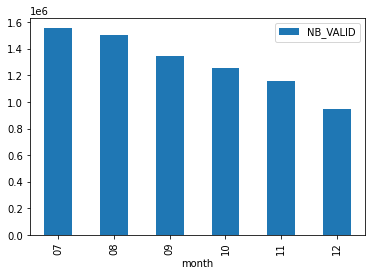

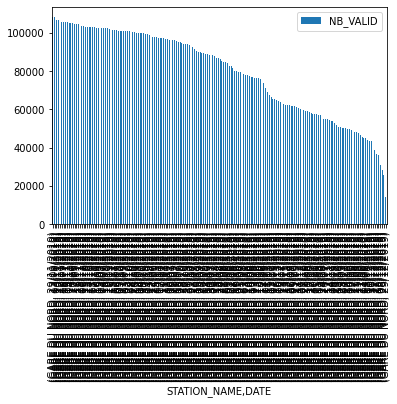

In [27]:
paris_nord_by_month.plot(kind='bar')
paris_nord.plot(kind='bar')

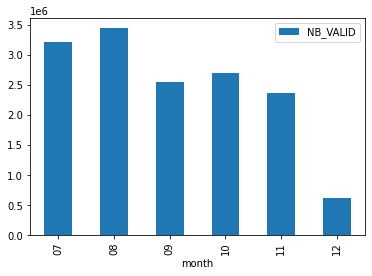

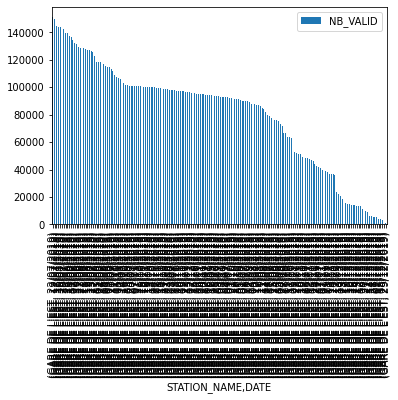

In [28]:
paris_est_by_month.plot(kind='bar')
paris_est.plot(kind='bar')

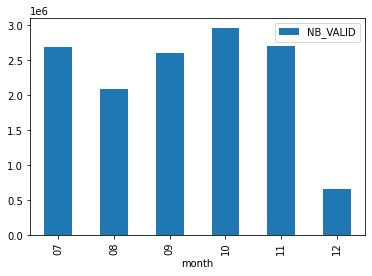

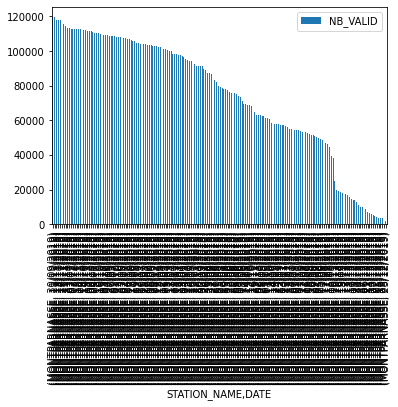

In [29]:
paris_montparnasse_by_month.plot(kind='bar')
paris_montparnasse.plot(kind='bar')

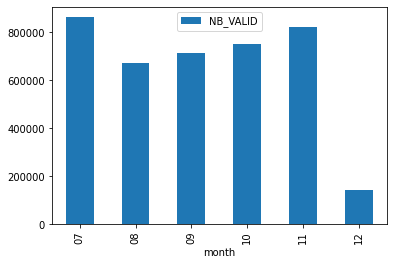

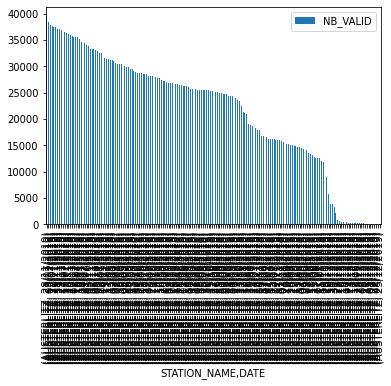

In [30]:
paris_austerlitz_by_month.plot(kind='bar')
paris_austerlitz.plot(kind='bar')

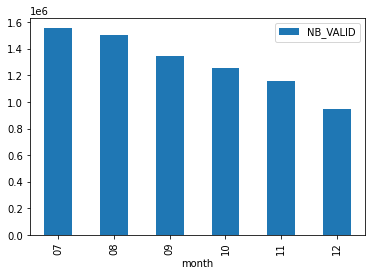

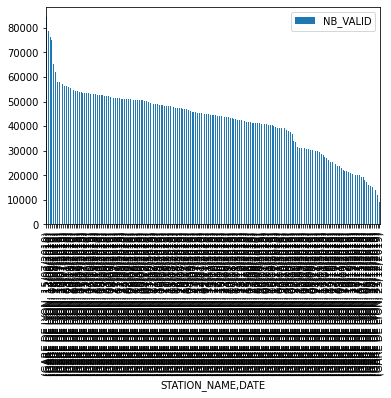

In [31]:
paris_lyon_by_month.plot(kind='bar')
paris_lyon.plot(kind='bar')

 **On observe pour chacune des gares que plus l'année avance, moins le nombre de gens validans leur titre de transport est élevé!!**


retard des trains aux grandes gares parisiennes

In [32]:
lgp=[].append(i for i in df1.columns if i.startwiths('Delay'))
lgp

In [33]:
dftemp=df1[df1['Departure station'].str.startswith('PARIS')]
dftemp=dftemp[dftemp['Year']==2019]

In [34]:
dfGP=pd.DataFrame(dftemp['Departure station'])
dfGP['Mois']=dftemp['Month'].astype(str)
dfGP['Year']=dftemp['Year'].astype(str)
dfGP['Sum']=0
for i in dftemp.columns:
  if i.startswith('Delay'):
    dfGP[i]=df1[i]
    dfGP['Sum']+=dfGP[i]


In [35]:
dfGP

,Departure station,Mois,Year,Sum,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
1,PARIS MONTPARNASSE,7.0,2019,100.0,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
4,PARIS MONTPARNASSE,7.0,2019,100.0,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385
5,PARIS MONTPARNASSE,7.0,2019,100.0,25.925926,33.333333,22.222222,18.518519,0.000000,0.000000
7,PARIS EST,7.0,2019,100.0,24.000000,18.000000,16.000000,26.000000,16.000000,0.000000
8,PARIS EST,7.0,2019,100.0,32.352941,14.705882,17.647059,23.529412,11.764706,0.000000
...,...,...,...,...,...,...,...,...,...,...
7546,PARIS LYON,12.0,2019,100.0,18.750000,0.000000,25.000000,25.000000,18.750000,12.500000
7548,PARIS LYON,12.0,2019,100.0,50.000000,7.142857,14.285714,14.285714,14.285714,0.000000
7550,PARIS LYON,12.0,2019,100.0,40.000000,0.000000,0.000000,60.000000,0.000000,0.000000
7551,PARIS LYON,12.0,2019,100.0,0.000000,33.333333,0.000000,33.333333,33.333333,0.000000


Les graphiques étudient les tendances que suivent chaque type de retard. Nous pouvons ainsi voir que le plupart des causes de retards tournent autour de 15 à 20% excepté les problème de gestion de gare qui se situe plutôt autour des 5%. Nous verrons plus tard les tendances pour chaque gares.

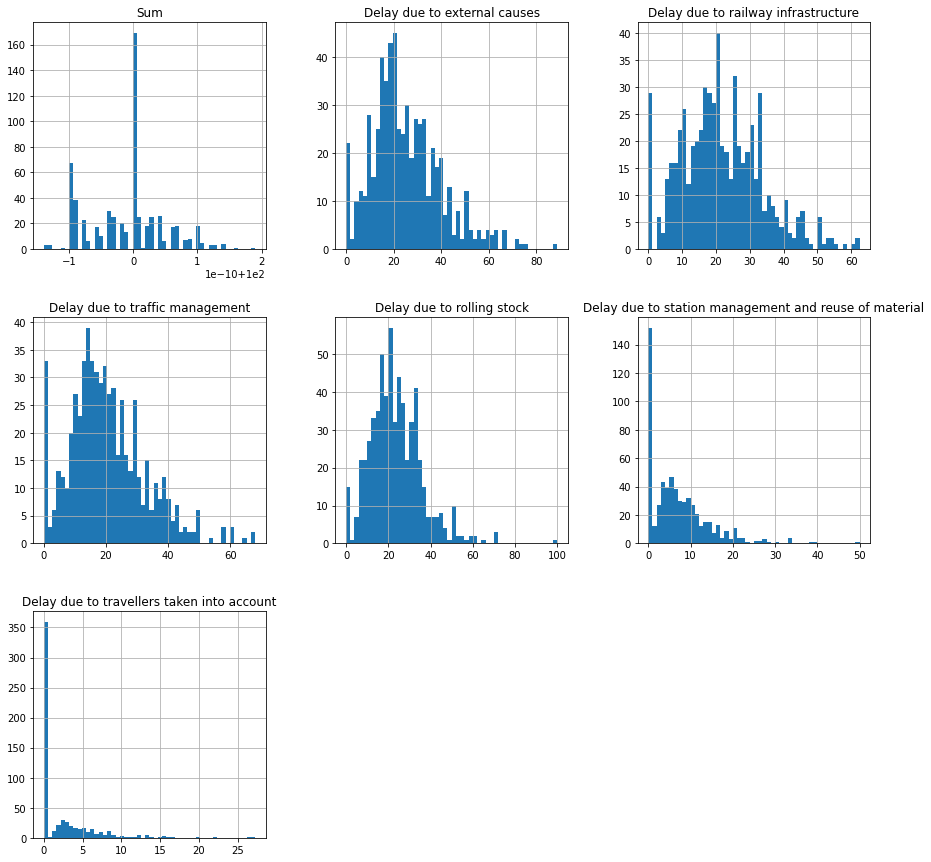

In [36]:
dfGP.hist(bins=50, figsize=(15,15))
plt.show()

Le graphique rapproche toutes les raisons pour étudier la moyenne des retard qui comme pouvait le faire deviner les graphique précédent, se rapproche des 20 %. Chaque cause de retard est donc sensé apparaitre environ 1 fois tous les 5 trains en retard quand les train partent d'une des gares de Paris .

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


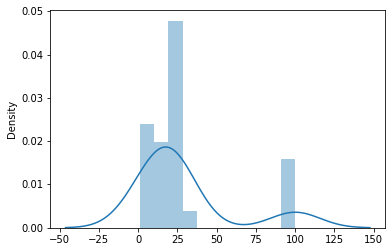

In [37]:
import seaborn as sns
sns.distplot(dfGP.groupby(by='Departure station').mean(),label=True)

In [38]:
gbdf=dfGP.groupby(by='Departure station').mean().transpose()
gbdf.drop('Sum',inplace=True)

In [39]:
df=gbdf.stack().reset_index().rename(columns={'level_0':'type of delay',0:'Cause de retard (%)'})


In [40]:
df

,type of delay,Departure station,Cause de retard (%)
0,Delay due to external causes,PARIS EST,21.028884
1,Delay due to external causes,PARIS LYON,23.777938
2,Delay due to external causes,PARIS MONTPARNASSE,28.098206
3,Delay due to external causes,PARIS NORD,28.955331
4,Delay due to railway infrastructure,PARIS EST,20.844274
5,Delay due to railway infrastructure,PARIS LYON,20.865891
6,Delay due to railway infrastructure,PARIS MONTPARNASSE,23.877274
7,Delay due to railway infrastructure,PARIS NORD,17.200958
8,Delay due to traffic management,PARIS EST,19.601488
9,Delay due to traffic management,PARIS LYON,19.860265


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf9e02be10>],
      dtype=object)

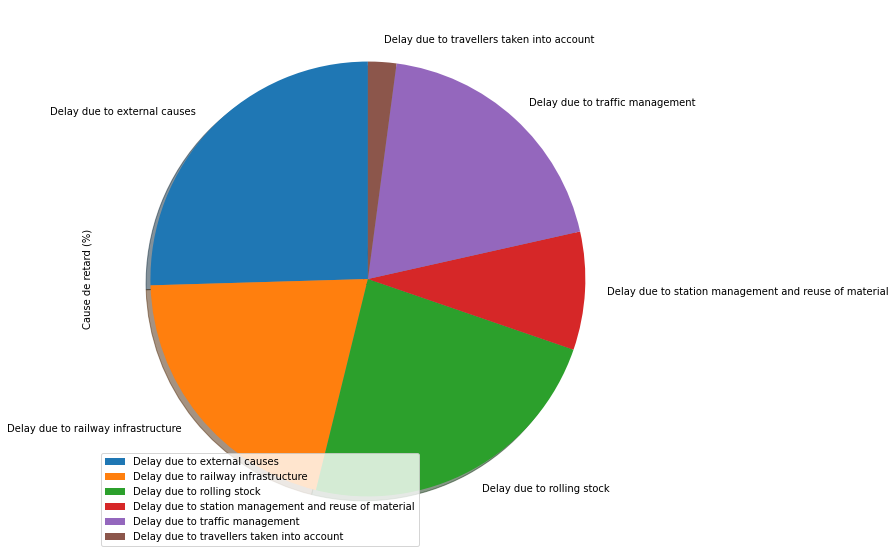

In [41]:
df.groupby(['type of delay']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,figsize=(15,10))

  Sur la globalité on peut observer que les causes de retard sont assez équilibrés entre les problèmes de matériel roulant, d'infrastructures ferroviaires et de gestion de traffic.

  Cependant, une grande partie est laissée à des causes externes (dont onne sait pas grand choses). De même, les soucis liés aux voyageurs semblent faibles.

  Nous essaierons de voir si derrière les problèmes de gestion de traffic et les causes externes on ne peut pas y voir une surpopulation dans les trains et si l'offre n'est pas adaptée à la demande. **bold text**


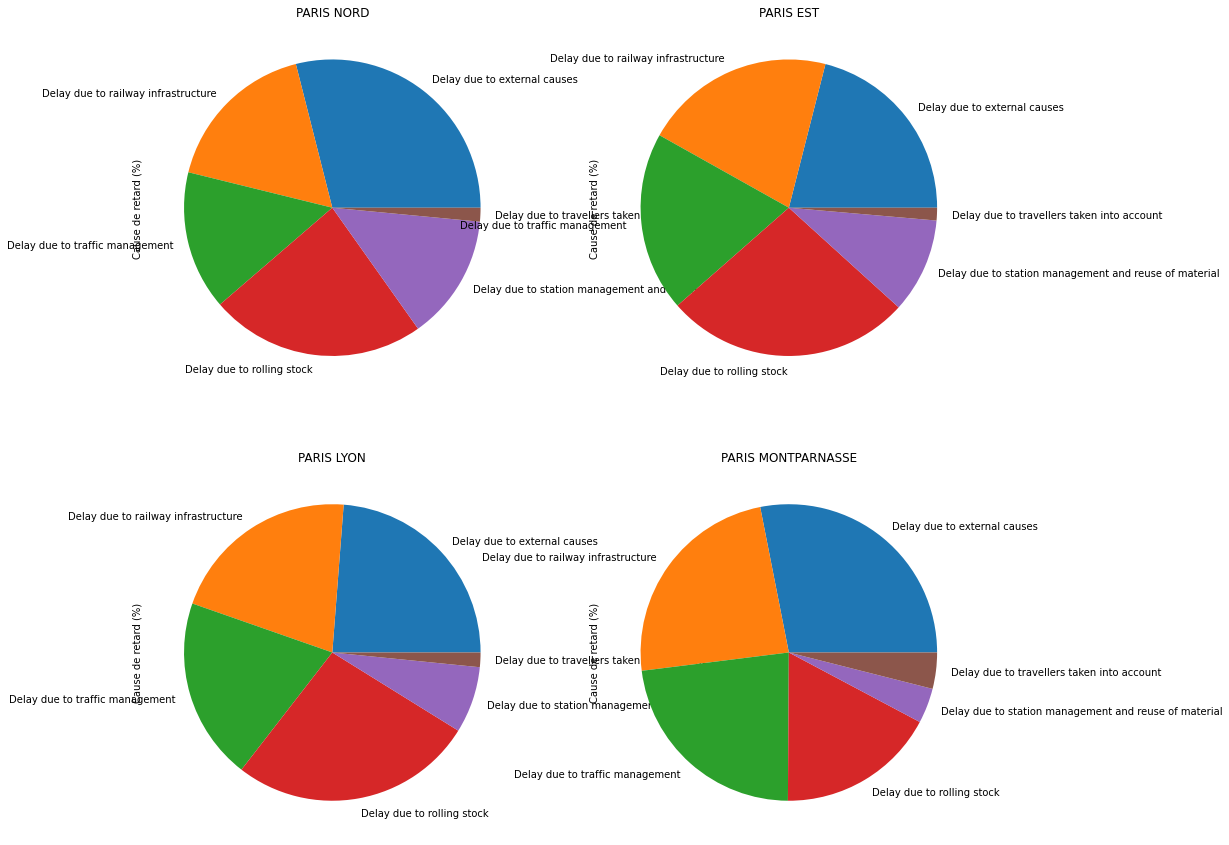

In [42]:
df = df.set_index("type of delay")

f, a = plt.subplots(2,2,figsize=(15,15))
for gare, ax in zip(set(df['Departure station']), a.ravel()):
    df[df['Departure station'].eq(gare)].plot.pie( y='Cause de retard (%)', ax=ax,legend=False,title=gare)

plt.show()

Cette seconde illustration montrant la répartition par gare confirme les hypothèses montrés par l'illustration précédente.

Montrons maintenant si les moments où il y a le plus de retard correspondent aux moments où les voyageurs sont les plus nombreux.
Cela se fera grâce aux données de retard des grandes gares parisiennes

In [43]:
dfGP.head(6)

,Departure station,Mois,Year,Sum,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
1,PARIS MONTPARNASSE,7.0,2019,100.0,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
4,PARIS MONTPARNASSE,7.0,2019,100.0,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385
5,PARIS MONTPARNASSE,7.0,2019,100.0,25.925926,33.333333,22.222222,18.518519,0.000000,0.000000
7,PARIS EST,7.0,2019,100.0,24.000000,18.000000,16.000000,26.000000,16.000000,0.000000
8,PARIS EST,7.0,2019,100.0,32.352941,14.705882,17.647059,23.529412,11.764706,0.000000
9,PARIS NORD,7.0,2019,100.0,6.666667,26.666667,20.000000,20.000000,26.666667,0.000000


In [44]:
lgp2=[].append(i for i in df1.columns if i.startswith('Number of late trains at departure'))
lgp2
dftemp2=df1[df1['Departure station'].str.startswith('PARIS')]
dftemp2=dftemp[dftemp['Year']==2019]
dfGP2=pd.DataFrame(dftemp['Departure station'])
dfGP2['Mois']=dftemp['Month']
dfGP2['Year']=dftemp['Year'].astype(str)
dfGP2["Number of late trains at departure"]=dftemp2["Number of late trains at departure"]
dfGP2

,Departure station,Mois,Year,Number of late trains at departure
1,PARIS MONTPARNASSE,7.0,2019,178.0
4,PARIS MONTPARNASSE,7.0,2019,284.0
5,PARIS MONTPARNASSE,7.0,2019,123.0
7,PARIS EST,7.0,2019,239.0
8,PARIS EST,7.0,2019,190.0
...,...,...,...,...
7546,PARIS LYON,12.0,2019,45.0
7548,PARIS LYON,12.0,2019,38.0
7550,PARIS LYON,12.0,2019,49.0
7551,PARIS LYON,12.0,2019,4.0


In [45]:
retards_mois=dfGP2.groupby('Mois').sum()
retards_mois.sort_values(by=['Mois'],ascending=True)

,Number of late trains at departure
Mois,
1.0,2226.0
2.0,1751.0
3.0,1730.0
4.0,3918.0
5.0,7493.0
6.0,8211.0
7.0,8361.0
8.0,6894.0
9.0,7781.0


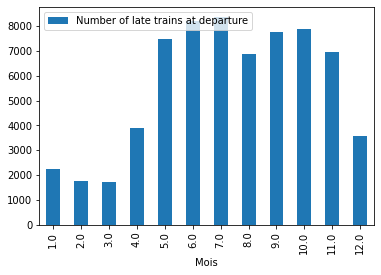

In [46]:
retards_mois.plot(kind='bar')

  On observe un maximum de départs en retard durant l'été ce qui s'explique par le grand nombre de départ en vacances en TGV. Puis une baisse sur la fin de l'année

  Cela semble confirmer notre Hypothèse suivant laquelle plus il y a de monde dans les trains, plus il y a de trains en retard.

  Regardons Gare par Gare pour avoir une vue plus détaillée.

In [47]:
retards_par_gare=dfGP2.groupby(['Departure station','Mois']).sum()
retards_par_gare

Number of late trains at departure
Departure station  Mois                                    
PARIS EST          1.0                                267.0
                   2.0                                286.0
                   3.0                                281.0
                   4.0                                352.0
                   5.0                               1160.0
                   6.0                               1203.0
                   7.0                               1316.0
                   8.0                               1196.0
                   9.0                               1214.0
                   10.0                              1270.0
                   11.0                              1154.0
                   12.0                               518.0
PARIS LYON         1.0                                898.0
                   2.0                                717.0
                   3.0                                545.0
                   4.0                                510.0
                   5.0                               1650.0
                   6.0                               2112.0
                   7.0                               2482.0
                   8.0                               1876.0
                   9.0                               1798.0
                   10.0                              2030.0
                   11.0                              1555.0
                   12.0                              1136.0
PARIS MONTPARNASSE 1.0                                823.0
                   2.0                                478.0
                   3.0                                664.0
                   4.0                               2652.0
                   5.0                               3875.0
                   6.0                               4050.0
                   7.0                               3814.0
                   8.0                               3250.0
                   9.0                               4007.0
                   10.0                              3840.0
                   11.0                              3611.0
                   12.0                              1508.0
PARIS NORD         1.0                                238.0
                   2.0                                270.0
                   3.0                                240.0
                   4.0                                404.0
                   5.0                                808.0
                   6.0                                846.0
                   7.0                                749.0
                   8.0                                572.0
                   9.0                                762.0
                   10.0                               761.0
                   11.0                               651.0
                   12.0                               431.0

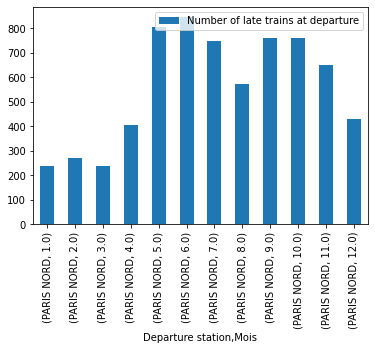

In [48]:
retards_par_gare.groupby('Departure station').get_group("PARIS NORD").plot(kind='bar')

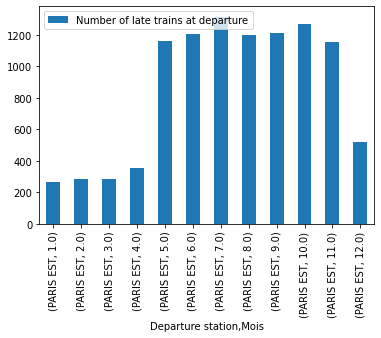

In [49]:
retards_par_gare.groupby('Departure station').get_group("PARIS EST").plot(kind='bar')

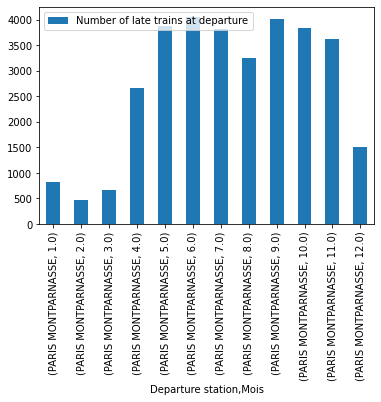

In [50]:
retards_par_gare.groupby('Departure station').get_group("PARIS MONTPARNASSE").plot(kind='bar')

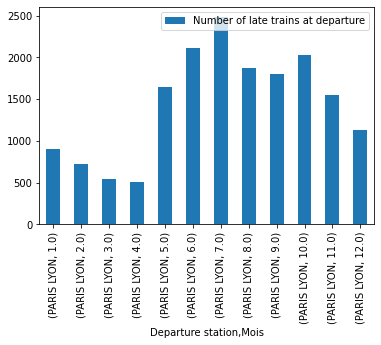

In [51]:
retards_par_gare.groupby('Departure station').get_group("PARIS LYON").plot(kind='bar')

Les résultats obtenus sur les gares de PARIS NORD et PARIS LYON confirment les hypothèses précédentes

#Conclusions

  Nous avons pu voir durant cette étude la répartition des causes des retards sur le réseau SNCF. On a observé les justifications classiques telles que les problèmes de matériel etc...

  Cependant nous avons apperçu un lien assez net entre l'affluence dans les gares (modélisé par le nombre de validations de titres de transport) et le retard des trains. Un modèle mathématique pourrait éventuellement être trouvé entre ces deux caractéristiques.


  Il pourrait être interessant d'étoffer notre étude à l'aide de données supplémentaires. Cela pourrait inclure les données de retards des trains Régionaux tels que les RER. En effet dans ces trains, l'impact de la foule sur le traffic semble être encore plus flagrante.